In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
users = pd.read_csv("Downloads/1481069814_relax_challenge/relax_challenge/takehome_users.csv", encoding='latin')

In [86]:
engage = pd.read_csv("Downloads/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv")

In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [20]:
#adopted user is a user who has logged into product on three seperate days in at least one 70 day period
#what features predict future user adoption 
#so object_id in the users table is the user_id so will need to use that for comparison 
#I think first step is to see if the user is adopted by creating a list
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [88]:
#going to change the time_stamp column to actual datetime 
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])

In [89]:
engage.index=engage['time_stamp']
engage.drop(labels='time_stamp', axis=1, inplace=True)
engage2 = engage.groupby([pd.Grouper(freq='W'), 'user_id']).sum()
#grouping by week so that I can then see which users have visited 3 or more times

In [90]:
engage['visited'].describe()
#so visited is always 1 so can essentially drop this column

count    207917.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: visited, dtype: float64

In [93]:
engage_sum = engage2[engage2.visited>=3].unstack(level=1).melt()

In [119]:
user_ids = pd.DataFrame(engage_sum.user_id.unique(), columns=['user_ids'])

In [120]:
#now I have the unique user_ids that logged onto product 3 times. 
user_ids.head()

,user_ids
0,1693
1,728
2,11764
3,5297
4,6171


In [100]:
engage_sum.head()

,None,user_id,value
0,visited,1693,3.0
1,visited,1693,NaN
2,visited,1693,3.0
3,visited,1693,NaN
4,visited,1693,3.0


In [181]:
#joined the user columns with the user_ids so that there is now a list of users that logged on 3 times, now I do EDA for top features
engage_join = users.merge(user_ids, how='inner', left_on='object_id', right_on='user_ids')
engage_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_ids
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42


(array([491.,   0., 275.,   0.,   0., 326.,   0., 206.,   0., 147.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

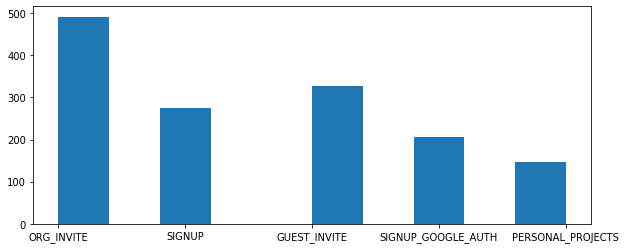

In [127]:
#since this a grouping of the users that logged on at least 3 times, I want to see which features are strongest. going to look at creation source, opted into mailing list, and perhaps invited bye user id
fig = plt.figure(figsize=(10,4))
plt.hist(engage_join['creation_source'])
#so does look like there is some variety in the creation source, which will be good to model, org invite is pretty high as wella s guestinvite

(array([1067.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         378.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

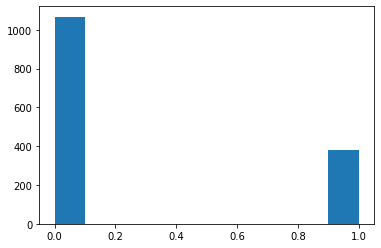

In [128]:
plt.hist(engage_join['opted_in_to_mailing_list'])
#so we see majority of people are not opted into the mailing list

(array([1221.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

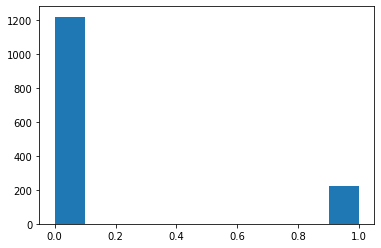

In [129]:
plt.hist(engage_join['enabled_for_marketing_drip'])
#also majority are note enabled for marketing drip 

In [182]:
#got dummy variables for columns of interest to use for modeling 
engage_join = pd.get_dummies(engage_join, columns=['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip'])

In [134]:
engage_join.head()

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,user_ids,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,1,316.0,2,0,1,0,0,0,1,0,1,0
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,318,4143.0,10,0,1,0,0,0,0,1,0,1
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,1.401364e+09,58,NaN,20,0,0,0,1,0,1,0,1,0
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,1.401518e+09,401,79.0,33,1,0,0,0,0,1,0,1,0
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,1.401045e+09,235,NaN,42,0,0,0,1,0,0,1,1,0


In [183]:
list(engage_join.columns)

['object_id',
 'creation_time',
 'name',
 'email',
 'last_session_creation_time',
 'org_id',
 'invited_by_user_id',
 'user_ids',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'opted_in_to_mailing_list_0',
 'opted_in_to_mailing_list_1',
 'enabled_for_marketing_drip_0',
 'enabled_for_marketing_drip_1']

In [184]:
#after playing around with some modeling and thinking about the goal of the project,I don't think that a model will be beneficial
#because the user ids are all distinct numbers, so that really isn't ideal for modeling. instead, I need to find a way to see how 
#how the features are weighted for this group of users that are active to see if there is any pattern or deductions that can be drawn
from sklearn.ensemble import ExtraTreesClassifier
X = engage_join[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]
y = engage_join[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
print(model.feature_importances_)
#looking at the feature importances for the creation source in regards to the active users, we can see that the highest is org invite, which makes sense
#since that was the highest we saw in the graphs plotted - going to look at other features than compare

[0.21793322 0.32160495 0.11481091 0.15967907 0.18597185]


In [148]:
X = engage_join[['opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1']]
y = engage_join[['opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1']]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
print(model.feature_importances_)
#looking at these features, we can see that not opting into mailing list is the most indicative 

[0.35905847 0.28565596 0.25229586 0.10298971]


In [189]:
#going to convert the invited by user ids to dummys but need to remove nans
#df[1].fillna(0, inplace=True)
engage_join['invited_by_user_id'].fillna(0, inplace=True)

In [166]:
engage_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1444
Data columns (total 11 columns):
object_id                     1445 non-null int64
creation_time                 1445 non-null object
name                          1445 non-null object
email                         1445 non-null object
creation_source               1445 non-null object
last_session_creation_time    1445 non-null float64
opted_in_to_mailing_list      1445 non-null int64
enabled_for_marketing_drip    1445 non-null int64
org_id                        1445 non-null int64
invited_by_user_id            1445 non-null float64
user_ids                      1445 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 135.5+ KB


In [190]:
engage_join['invited_true'] = engage_join.loc[engage_join.invited_by_user_id > 0.0] = 1

In [170]:
engage_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_ids,invited_true
0,1,1,1,1,1,1.000000e+00,1,1,1,1.0,1,1
1,1,1,1,1,1,1.000000e+00,1,1,1,1.0,1,1
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,0.0,20,1
3,1,1,1,1,1,1.000000e+00,1,1,1,1.0,1,1
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,0.0,42,1


(array([628.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 817.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

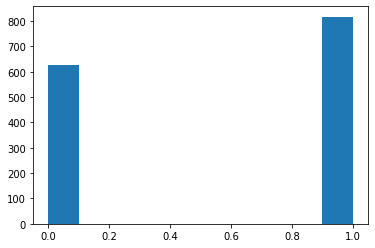

In [175]:
plt.hist(engage_join['invited_by_user_id'])
#so can see in plot that more users were invited by user id 

In [195]:
X = engage_join[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1', 'invited_by_user_id']]
y = engage_join[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_0', 'opted_in_to_mailing_list_1', 'enabled_for_marketing_drip_0', 'enabled_for_marketing_drip_1', 'invited_by_user_id']]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
print(model.feature_importances_)
#so looking at the features all together, we see that the strongest is actually being invited by user ID with second strongest being opted into mailing list 

[0.11858994 0.21405546 0.07706128 0.05950102 0.04958386 0.0396131
 0.09088219 0.03210479 0.07731168 0.24129668]


In [197]:
fit = model.fit(X,y)
model2 = model.feature_importances_
indices = np.argsort(model2)

In [200]:
normalized_feat = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

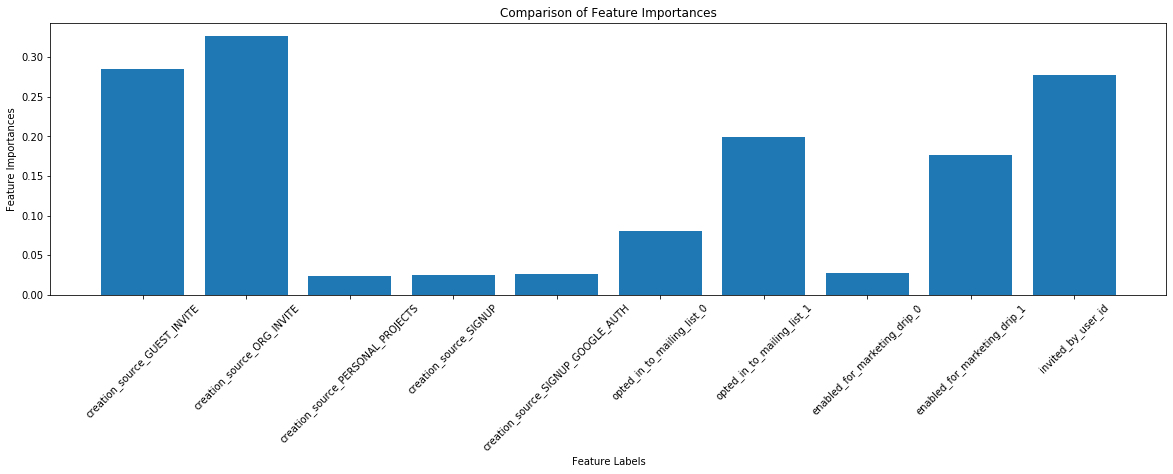

In [204]:
ig = plt.figure(figsize=(20,5))
plt.bar(X.columns, normalized_feat)
plt.xticks(rotation=45)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of Feature Importances')
plt.show()
#looking at the graphical representation of the features, we can see that creation source org invite is highest, second is
#guest invite, and last is being invited by user id 